In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [7]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
19h 50m      1
36h 25m      1
29h 10m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
df.dropna(axis=0,how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [10]:
df.drop(['Date_of_Journey'],axis = 1,inplace=True)

In [11]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [12]:
df.drop(['Dep_Time'],axis = 1,inplace=True)

In [13]:
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis = 1,inplace=True)

In [14]:
dur = list(df['Duration'])
n = len(dur)
for i in range(n):
    if len(dur[i].split())!= 2:
        if 'h' in dur[i]:
            dur[i] = dur[i].strip()+' 0m'
        else :
            dur[i] = '0h ' + dur[i].strip()
dur_hrs = []
dur_min = []
for i in range(n):
    dur_hrs.append(int((dur[i].strip()+' 0m').split('h')[0]))
    dur_min.append(int((dur[0].strip()+' 0m').split('m')[0].split()[-1]))

In [15]:
df['Duration_hours'] = dur_hrs
df['Duration_minute'] = dur_min

In [16]:
df.drop(['Duration'],axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,50


In [18]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [19]:
df['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},regex=True,inplace=True)

In [20]:
# Now we can drop Route column as we are taking Total_Stops for consideration.
df.drop(['Route'], axis = 1, inplace = True)

In [21]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [22]:
# It means we can drop Additional_Info , since more than 80% of values are No info
df.drop(['Additional_Info'], axis = 1, inplace = True)

In [23]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,50


In [24]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## EDA

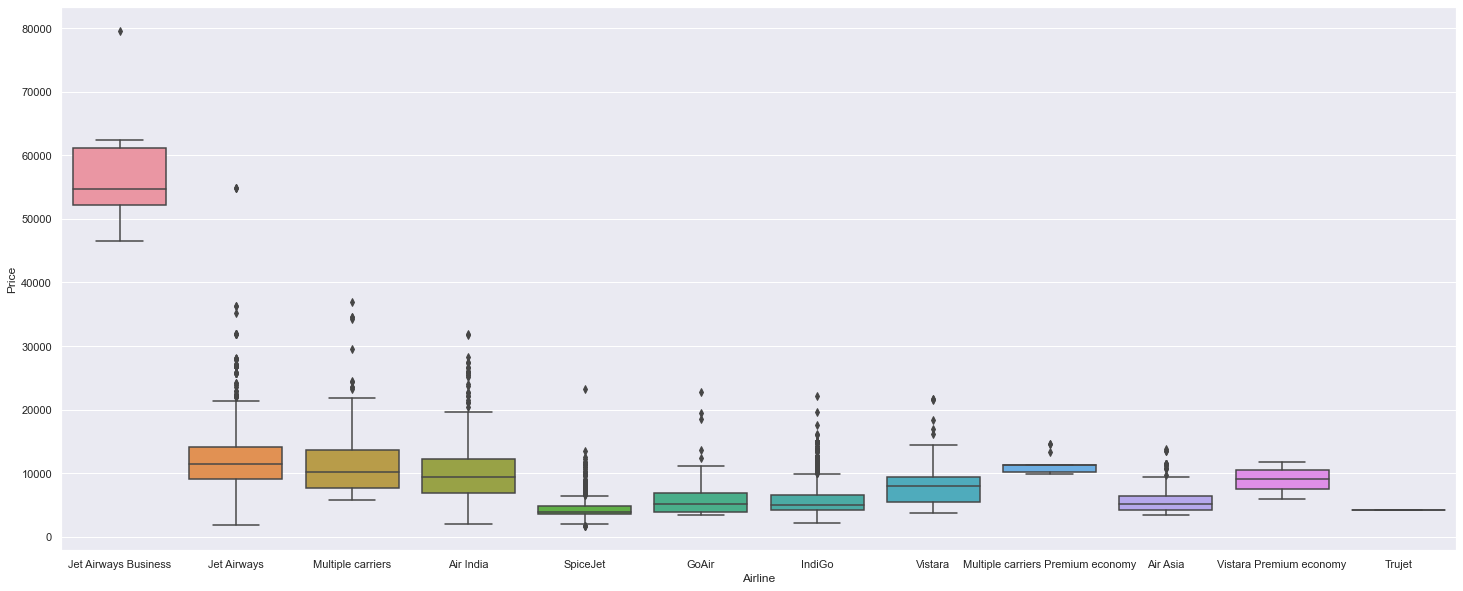

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(x = 'Airline', y = 'Price', data = df.sort_values('Price',ascending = False));
# Based On Price, Jet Airways Business has the highest price.

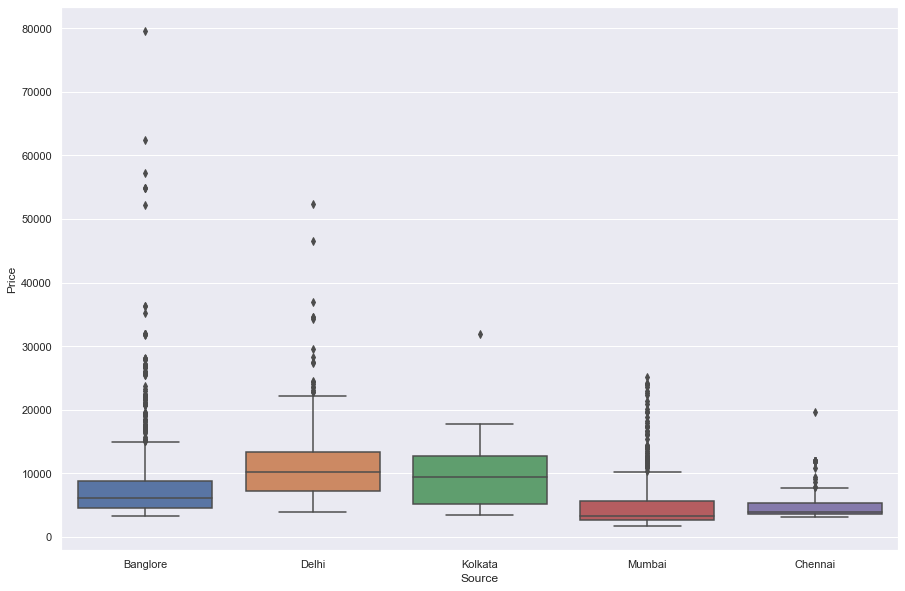

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x = 'Source', y = 'Price', data = df.sort_values('Price',ascending = False));

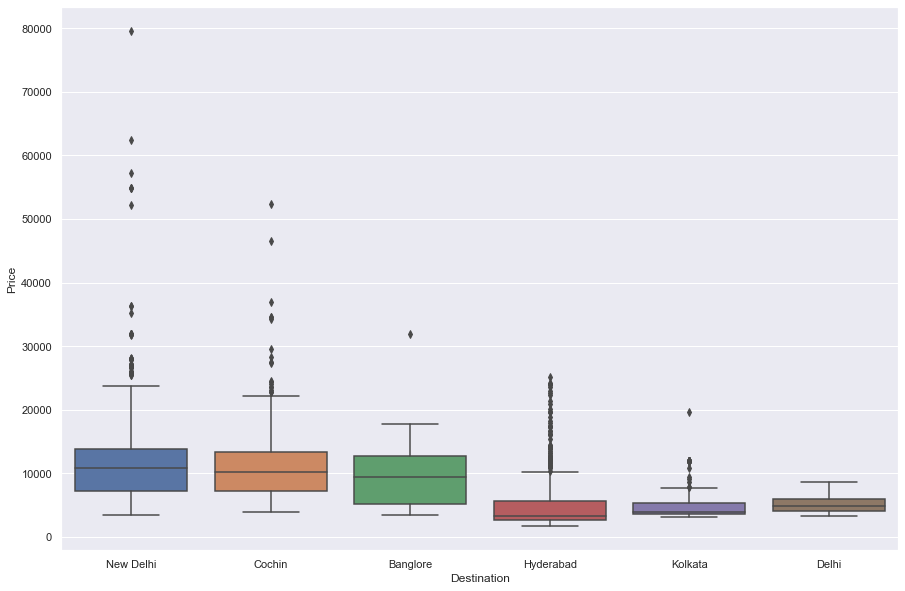

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x = 'Destination', y = 'Price', data = df.sort_values('Price',ascending = False));

In [28]:
X = df.drop(columns = 'Price')
Y = df['Price']

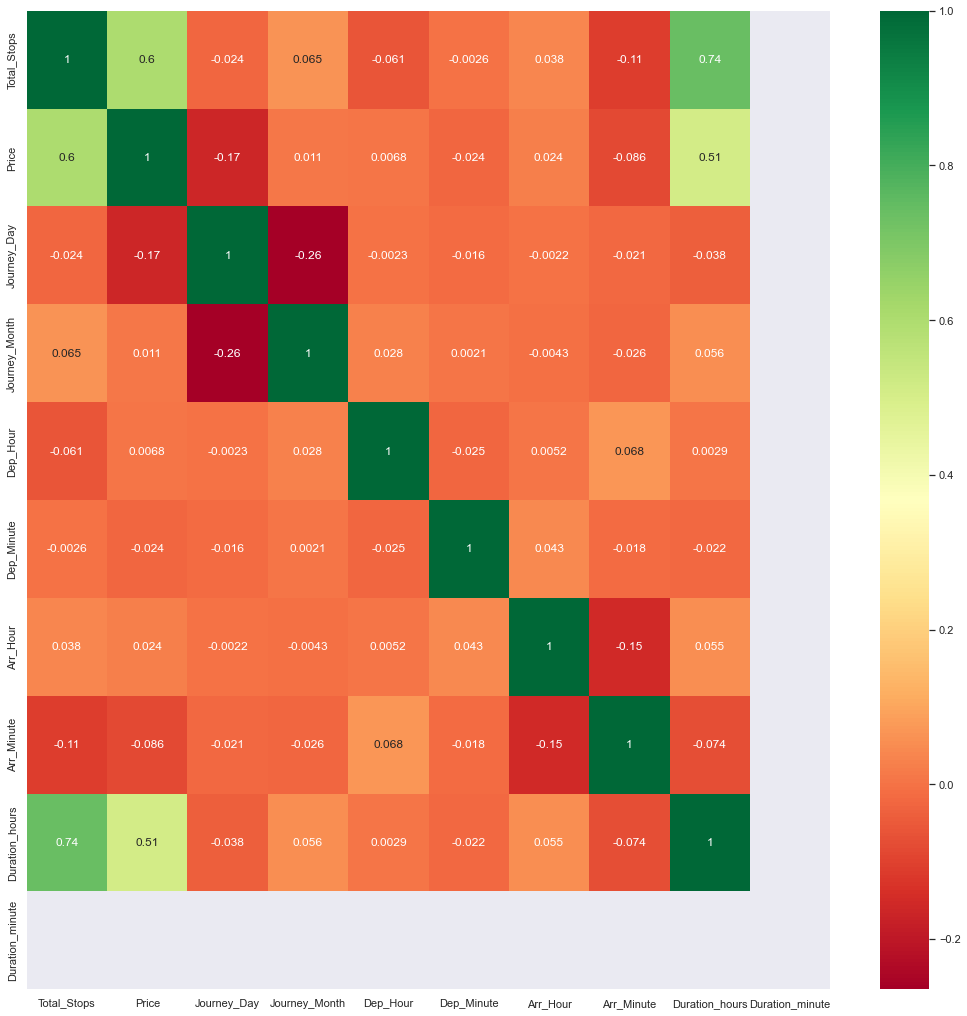

In [29]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [30]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,9,19,55,22,25,2,50
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,50
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,50
10681,Vistara,Banglore,New Delhi,0,12648,3,1,11,30,14,10,2,50


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [32]:
# We will use dummy encoding technique here as we can see that Airline, Source and Destination columns are nominal data.
# We will be using Column Transformer and pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

column_tr = make_column_transformer((OneHotEncoder(drop = 'first') ,['Airline','Source','Destination']),remainder = 'passthrough')
pipe =  make_pipeline(column_tr,rf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [33]:
y_pred = pipe.predict(X_test)

In [34]:
pipe.score(X_train,y_train)

0.9520295842523016

In [35]:
pipe.score(X_test,y_test)

0.7923580552676935

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


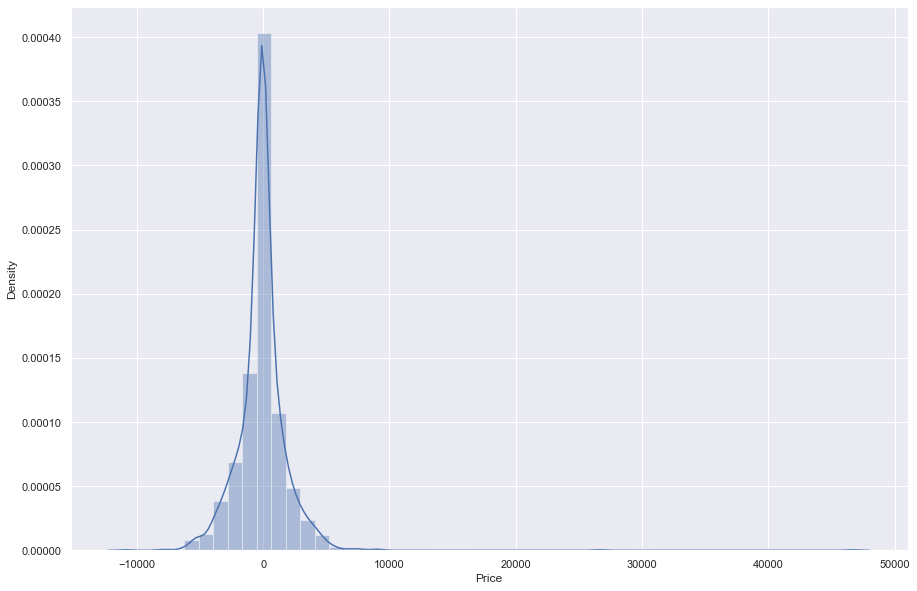

In [36]:
sns.distplot(y_test-y_pred)
plt.show()

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1193.5513728739027
MSE: 4477187.30757648
RMSE: 2115.9365083991725
